In [10]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

SyntaxError: ignored

In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
 [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
 [reverse_word_index.get(i - 3, "?") for i in train_data[1]])
decoded_newswire

'? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa ? factors generale de banque said in a statement it gave no financial details of the transaction sa ? ? turnover in 1986 was 17 5 billion belgian francs reuter 3'

In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
 results = np.zeros((len(sequences), dimension))
 for i, sequence in enumerate(sequences):
   for j in sequence:
    results[i, j] = 1.
 return results

In [7]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [8]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [12]:
from tensorflow import keras
from keras import layers
model = keras.Sequential([
      layers.Dense(64, activation = "relu"),
      layers.Dense(64, activation = "relu"),
      layers.Dense(46, activation = "softmax"),
      
])

In [13]:
model.compile(optimizer = "rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [15]:
history = model.fit( partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 63ms/step - loss: 2.7899 - accuracy: 0.4754 - val_loss: 1.8440 - val_accuracy: 0.6230
Epoch 2/20
16/16 [==============================] - 1s 47ms/step - loss: 1.4827 - accuracy: 0.6952 - val_loss: 1.3423 - val_accuracy: 0.7060
Epoch 3/20
16/16 [==============================] - 1s 49ms/step - loss: 1.0842 - accuracy: 0.7746 - val_loss: 1.1597 - val_accuracy: 0.7480
Epoch 4/20
16/16 [==============================] - 1s 48ms/step - loss: 0.8566 - accuracy: 0.8232 - val_loss: 1.0753 - val_accuracy: 0.7650
Epoch 5/20
16/16 [==============================] - 1s 47ms/step - loss: 0.6823 - accuracy: 0.8616 - val_loss: 0.9771 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 1s 47ms/step - loss: 0.5500 - accuracy: 0.8871 - val_loss: 0.9597 - val_accuracy: 0.8030
Epoch 7/20
16/16 [==============================] - 1s 47ms/step - loss: 0.4404 - accuracy: 0.9097 - val_loss: 0.9065 - val_accuracy: 0.8160
Epoch 8/20
16

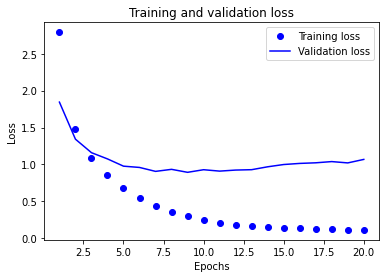

In [18]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

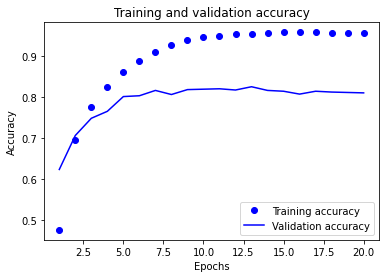

In [19]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [20]:
model = keras.Sequential([
 layers.Dense(64, activation="relu"),
 layers.Dense(64, activation="relu"),
 layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
 loss="categorical_crossentropy",
 metrics=["accuracy"])
model.fit(x_train,
 y_train,
 epochs=9,
 batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 45ms/step - loss: 2.3417 - accuracy: 0.5088
Epoch 2/9
18/18 [==============================] - 1s 44ms/step - loss: 1.3261 - accuracy: 0.7102
Epoch 3/9
18/18 [==============================] - 1s 45ms/step - loss: 0.9998 - accuracy: 0.7901
Epoch 4/9
18/18 [==============================] - 1s 44ms/step - loss: 0.7795 - accuracy: 0.8376
Epoch 5/9
18/18 [==============================] - 1s 44ms/step - loss: 0.6112 - accuracy: 0.8744
Epoch 6/9
18/18 [==============================] - 1s 43ms/step - loss: 0.4896 - accuracy: 0.8996
Epoch 7/9
18/18 [==============================] - 1s 43ms/step - loss: 0.3876 - accuracy: 0.9181
Epoch 8/9
18/18 [==============================] - 1s 43ms/step - loss: 0.3190 - accuracy: 0.9300
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9501 - accuracy: 0.7947
